In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
path = r'/Users/jazmingutierrez/DEC2023 Instacart Basket Analysis'

In [3]:
ords_prods_merge= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'aggregated_ords_prods_merge.pkl'))

In [4]:
#checking data
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spender,spender_flag,average_spend,Customer_frequency,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Regularly busy,Regularly busy,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Regularly busy,Least busiest days,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer
2,473747,1,3,3,12,21.0,196,1,1,both,...,Regularly busy,Least busiest days,Most orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Least busy,Least busiest days,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer
4,431534,1,5,4,15,28.0,196,1,1,both,...,Least busy,Least busiest days,Most orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer


## Creating Bar Cahrt

<Axes: xlabel='orders_day_of_week'>

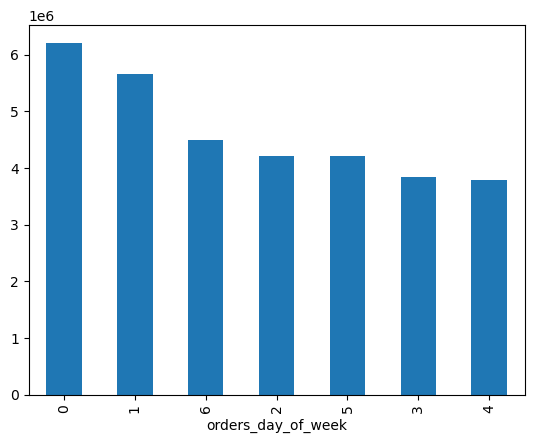

In [5]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

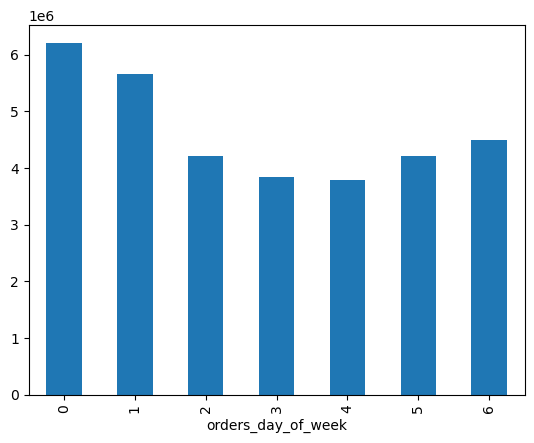

In [6]:
# creating barchart ordered from largest to smallest
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# ordering frequencies
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: count, dtype: int64

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: count, dtype: int64

[Text(0.5, 0, 'Days of the Week'),
 Text(0, 0.5, 'Orders Amount'),
 Text(0.5, 1.0, 'Orders by Day')]

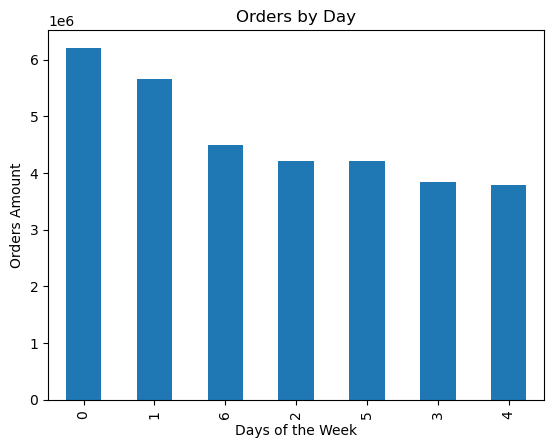

In [11]:
# adding color to chart
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()
bar.set(xlabel= 'Days of the Week', ylabel = 'Orders Amount', title= 'Orders by Day')

In [12]:
# export chart as figure
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Creating Histograms

<Axes: ylabel='Frequency'>

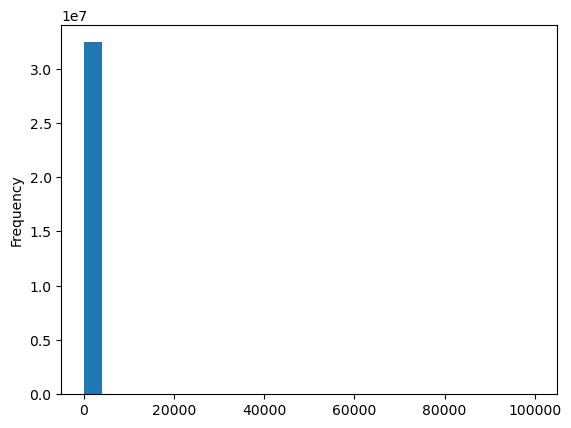

In [11]:
# histogram 
ords_prods_merge['prices'].plot.hist(bins= 25)

In [12]:
#check data 
ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
ords_prods_merge['prices'].mean()

11.98114392296625

In [14]:
ords_prods_merge['prices'].median()

7.4

In [15]:
ords_prods_merge['prices'].max()

99999.0

## Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

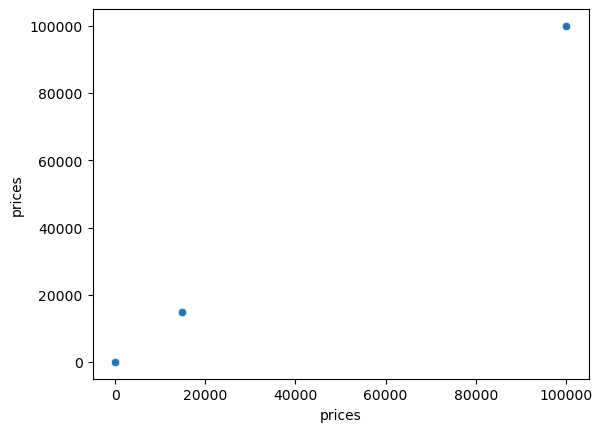

In [16]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [17]:
# running a check to identify outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spender,spender_flag,average_spend,Customer_frequency,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,both,...,Regularly busy,Regularly busy,Most orders,40,Regular customer,14900.0,High_spender,108.648299,5.0,Frequent Customer
10030346,603376,17,22,6,16,4.0,21553,3,1,both,...,Regularly busy,Regularly busy,Most orders,40,Regular customer,14900.0,High_spender,108.648299,5.0,Frequent Customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,both,...,Regularly busy,Regularly busy,Average orders,4,New customer,14900.0,High_spender,1154.792308,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,both,...,Busiest day,Busiest days,Average orders,4,New customer,14900.0,High_spender,1154.792308,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,both,...,Regularly busy,Busiest days,Average orders,16,Regular customer,14900.0,High_spender,114.426619,23.0,Non_frequent_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,2249946,204099,29,0,8,4.0,33664,1,0,both,...,Busiest day,Busiest days,Average orders,39,Regular customer,99999.0,High_spender,1106.743956,4.0,Frequent Customer
29193269,2363282,204099,31,0,9,2.0,33664,1,1,both,...,Busiest day,Busiest days,Most orders,39,Regular customer,99999.0,High_spender,1106.743956,4.0,Frequent Customer
29193270,3181945,204395,13,3,15,8.0,33664,25,0,both,...,Regularly busy,Least busiest days,Most orders,15,Regular customer,99999.0,High_spender,451.153540,5.0,Frequent Customer
29193271,2486215,205227,7,3,20,4.0,33664,8,0,both,...,Regularly busy,Least busiest days,Average orders,12,Regular customer,99999.0,High_spender,1178.381871,12.0,Regular customer


prices satrt with an odd price of 14900 to a price of 99999

In [18]:
# turn outliers to missing values 
ords_prods_merge.loc[ords_prods_merge['prices']>100, 'prices'] =np.nan

In [19]:
# check for max value
ords_prods_merge['prices'].max()

25.0

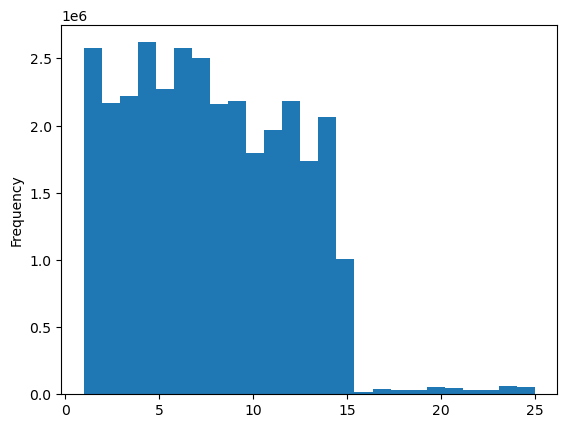

In [20]:
# retry histogram
hist = ords_prods_merge['prices'].plot.hist(bins=25)

In [21]:
# export chart as figure
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

## Creating line charts

### Creating a sample 

In [22]:
# Set the seed
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [23]:
dev

array([False,  True, False, ..., False,  True,  True])

In [24]:
# create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [26]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [27]:
# Store 30% of sample dataframe small
small = ords_prods_merge[~dev]

In [28]:
# checking for full dataframe
len(ords_prods_merge)

32434212

In [29]:
# checking for big and small together
len(big) + len (small)

32434212

In [30]:
# Create dataframe for small 
df_2 = small [['orders_day_of_week', 'prices']]

/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


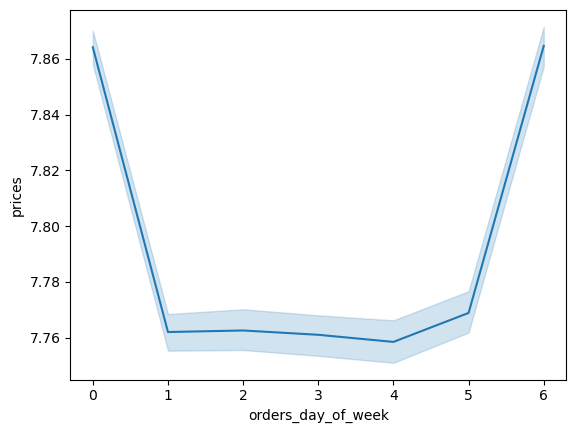

In [32]:
# create linechart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')